In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [6]:
data = pd.read_csv("Iris.csv", index_col = 'Id')

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]
y = data['Species']

In [12]:
x_train, x_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 1)

In [13]:
x_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000
mean,5.800000,3.033333,3.739048,1.189524
std,0.844553,0.415254,1.787429,0.784333
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.600000,0.200000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [16]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#### Comparing the first few entries of true labels and predicted labels:

In [19]:
y_pred[:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [20]:
y_test.head()

Id
15         Iris-setosa
99     Iris-versicolor
76     Iris-versicolor
17         Iris-setosa
132     Iris-virginica
Name: Species, dtype: object

#### Printing as a dataframe

In [22]:
pd.DataFrame({"True Values" : y_test.head(), "Predicted Values" : y_pred[:5]})

,True Values,Predicted Values
Id,,
15,Iris-setosa,Iris-setosa
99,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
17,Iris-setosa,Iris-setosa
132,Iris-virginica,Iris-virginica


### Accuracy Score

In [24]:
accuracy_score(y_pred, y_test)

0.9555555555555556

### Confusion Matrix

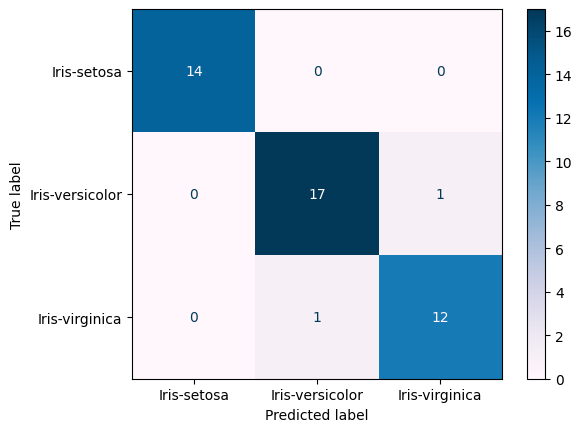

In [23]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap = "PuBu")

### Decision Tree

[Text(0.4, 0.9, 'PetalLengthCm <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalWidthCm <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'PetalLengthCm <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'SepalLengthCm <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.8, 0.5, 'PetalLengthCm <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1,

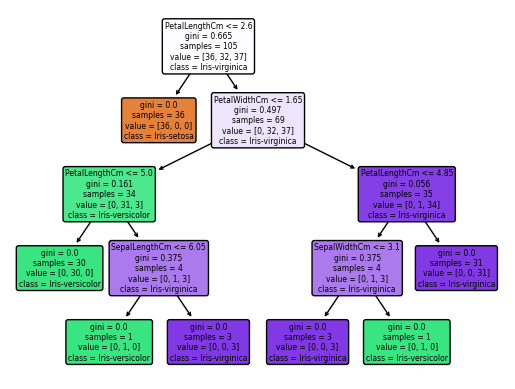

In [34]:
plot_tree(model, feature_names = features, class_names = y.unique(), filled=True, rounded=True)